# Plot spatial and boxplot streamflow results

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import string
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

## Set Paths

In [2]:
# Set paths
ROOT = Path('/gpfs/work1/0/wtrcycle/users/jaerts/model_refinement_pub/')
RESULTS = f'{ROOT}/results/'
AUXDIR = f'{ROOT}/aux_data/'

## Set config

In [3]:
# Set Files
basins_shp = f"{AUXDIR}/camels-gb/CAMELS_GB_catchment_boundaries/CAMELS_GB_catchment_boundaries.shp"
results_csv = f"{RESULTS}/rf_feature_selection/rf_wflow_pcrglob_evaporation_camels_hydro_attrs.csv"

## Load basin shapefiles

In [4]:
# Read shapefile
gdf = gpd.read_file(basins_shp)
gdf = gdf.set_index('ID_STRING')
gdf.index = gdf.index.astype(int)

# Reproject shapefile
gdf = gdf.to_crs({'init':'epsg:4326'})
gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")

/home/jaerts/miniconda3/envs/wflow_state_flux/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/scratch-local/jaerts.4291379/ipykernel_2295514/1606819374.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")


## Load and merge model results

In [5]:
# Load results dataframe
df = pd.read_csv(results_csv, index_col='basin_id')

# Merge results and shapefile
gdf_results = gdf.merge(df, left_index=True, right_index=True, how="inner")
gdf_results = gdf_results.set_geometry("centroid")

## Calculate delta results

In [6]:
gdf_results['RRMSE_et_delta_wp'] = gdf_results['RRMSE_et_wflow'] - gdf_results['RRMSE_et_pcrglob']
gdf_results['RRMSE_et_delta_pw'] = gdf_results['RRMSE_et_pcrglob'] - gdf_results['RRMSE_et_wflow']

## Calculate CDF and include Quantiles

In [7]:
# Add quantile rank
gdf_results['QuantileRank_wflow']= pd.qcut(gdf_results['RRMSE_et_wflow'],
                                             q = 4, labels = False)
gdf_results['QuantileRank_pcrglob']= pd.qcut(gdf_results['RRMSE_et_pcrglob'],
                                             q = 4, labels = False)
gdf_results['QuantileRank_delta']= pd.qcut(gdf_results['RRMSE_et_delta_wp'],
                                             q = 4, labels = False)

N = len(gdf_results)
x_wflow = np.sort(gdf_results['RRMSE_et_wflow'].values)
y_wflow = np.arange(N) / float(N)

x_pcrglob = np.sort(gdf_results['RRMSE_et_pcrglob'].values)
y_pcrglob = np.arange(N) / float(N)

x_delta = np.sort(gdf_results['RRMSE_et_delta_wp'].values)
y_delta = np.arange(N) / float(N)

Q25_wflow_min = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 0]['RRMSE_et_wflow'].min()
Q25_wflow_max = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 0]['RRMSE_et_wflow'].max()

Q50_wflow_min = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 1]['RRMSE_et_wflow'].min()
Q50_wflow_max = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 1]['RRMSE_et_wflow'].max()

Q75_wflow_min = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 2]['RRMSE_et_wflow'].min()
Q75_wflow_max = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 2]['RRMSE_et_wflow'].max()

Q100_wflow_min = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 3]['RRMSE_et_wflow'].min()
Q100_wflow_max = gdf_results.loc[gdf_results['QuantileRank_wflow'] == 3]['RRMSE_et_wflow'].max()


Q25_pcrglob_min = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 0]['RRMSE_et_pcrglob'].min()
Q25_pcrglob_max = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 0]['RRMSE_et_pcrglob'].max()

Q50_pcrglob_min = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 1]['RRMSE_et_pcrglob'].min()
Q50_pcrglob_max = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 1]['RRMSE_et_pcrglob'].max()

Q75_pcrglob_min = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 2]['RRMSE_et_pcrglob'].min()
Q75_pcrglob_max = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 2]['RRMSE_et_pcrglob'].max()

Q100_pcrglob_min = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 3]['RRMSE_et_pcrglob'].min()
Q100_pcrglob_max = gdf_results.loc[gdf_results['QuantileRank_pcrglob'] == 3]['RRMSE_et_pcrglob'].max()

Q25_delta_min = gdf_results.loc[gdf_results['QuantileRank_delta'] == 0]['RRMSE_et_delta_wp'].min()
Q25_delta_max = gdf_results.loc[gdf_results['QuantileRank_delta'] == 0]['RRMSE_et_delta_wp'].max()

Q50_delta_min = gdf_results.loc[gdf_results['QuantileRank_delta'] == 1]['RRMSE_et_delta_wp'].min()
Q50_delta_max = gdf_results.loc[gdf_results['QuantileRank_delta'] == 1]['RRMSE_et_delta_wp'].max()

Q75_delta_min = gdf_results.loc[gdf_results['QuantileRank_delta'] == 2]['RRMSE_et_delta_wp'].min()
Q75_delta_max = gdf_results.loc[gdf_results['QuantileRank_delta'] == 2]['RRMSE_et_delta_wp'].max()

Q100_delta_min = gdf_results.loc[gdf_results['QuantileRank_delta'] == 3]['RRMSE_et_delta_wp'].min()
Q100_delta_max = gdf_results.loc[gdf_results['QuantileRank_delta'] == 3]['RRMSE_et_delta_wp'].max()

# df_wflow = df_wflow.drop(columns=['QuantileRank'])

df_wflow=pd.DataFrame(data=[x_wflow,y_wflow]).T
df_wflow.columns=['RRMSE','CDF']

df_pcrglob=pd.DataFrame(data=[x_pcrglob,y_pcrglob]).T
df_pcrglob.columns=['RRMSE','CDF']

df_delta=pd.DataFrame(data=[x_delta,y_delta]).T
df_delta.columns=['RRMSE','CDF']

In [8]:
df_wflow.loc[df_wflow['RRMSE'] > 2, 'RRMSE'] = 2
df_pcrglob.loc[df_pcrglob['RRMSE'] > 2, 'RRMSE'] = 2

df_delta.loc[df_delta['RRMSE'] < -2, 'RRMSE'] = -2
df_delta.loc[df_delta['RRMSE'] > 2, 'RRMSE'] = 2

# df_wflow = df_wflow.loc[df_wflow['KGE-NP'] >= -1]
# df_pcrglob = df_wflow.loc[df_pcrglob['KGE-NP'] >= -1]


# df_delta = df_delta.loc[(df_delta['KGE-NP'] >= -1) & (df_delta['KGE-NP'] <= 1)]

## Create spatial plot

/scratch-local/jaerts.4291379/ipykernel_2295514/1792038929.py:156: UserWarning: FixedFormatter should only be used together with FixedLocator
  cmap.set_yticklabels(yticks)
/scratch-local/jaerts.4291379/ipykernel_2295514/1792038929.py:158: UserWarning: FixedFormatter should only be used together with FixedLocator
  cmap.set_yticklabels(yticks)
/scratch-local/jaerts.4291379/ipykernel_2295514/1792038929.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator
  cmap.set_yticklabels(yticks)


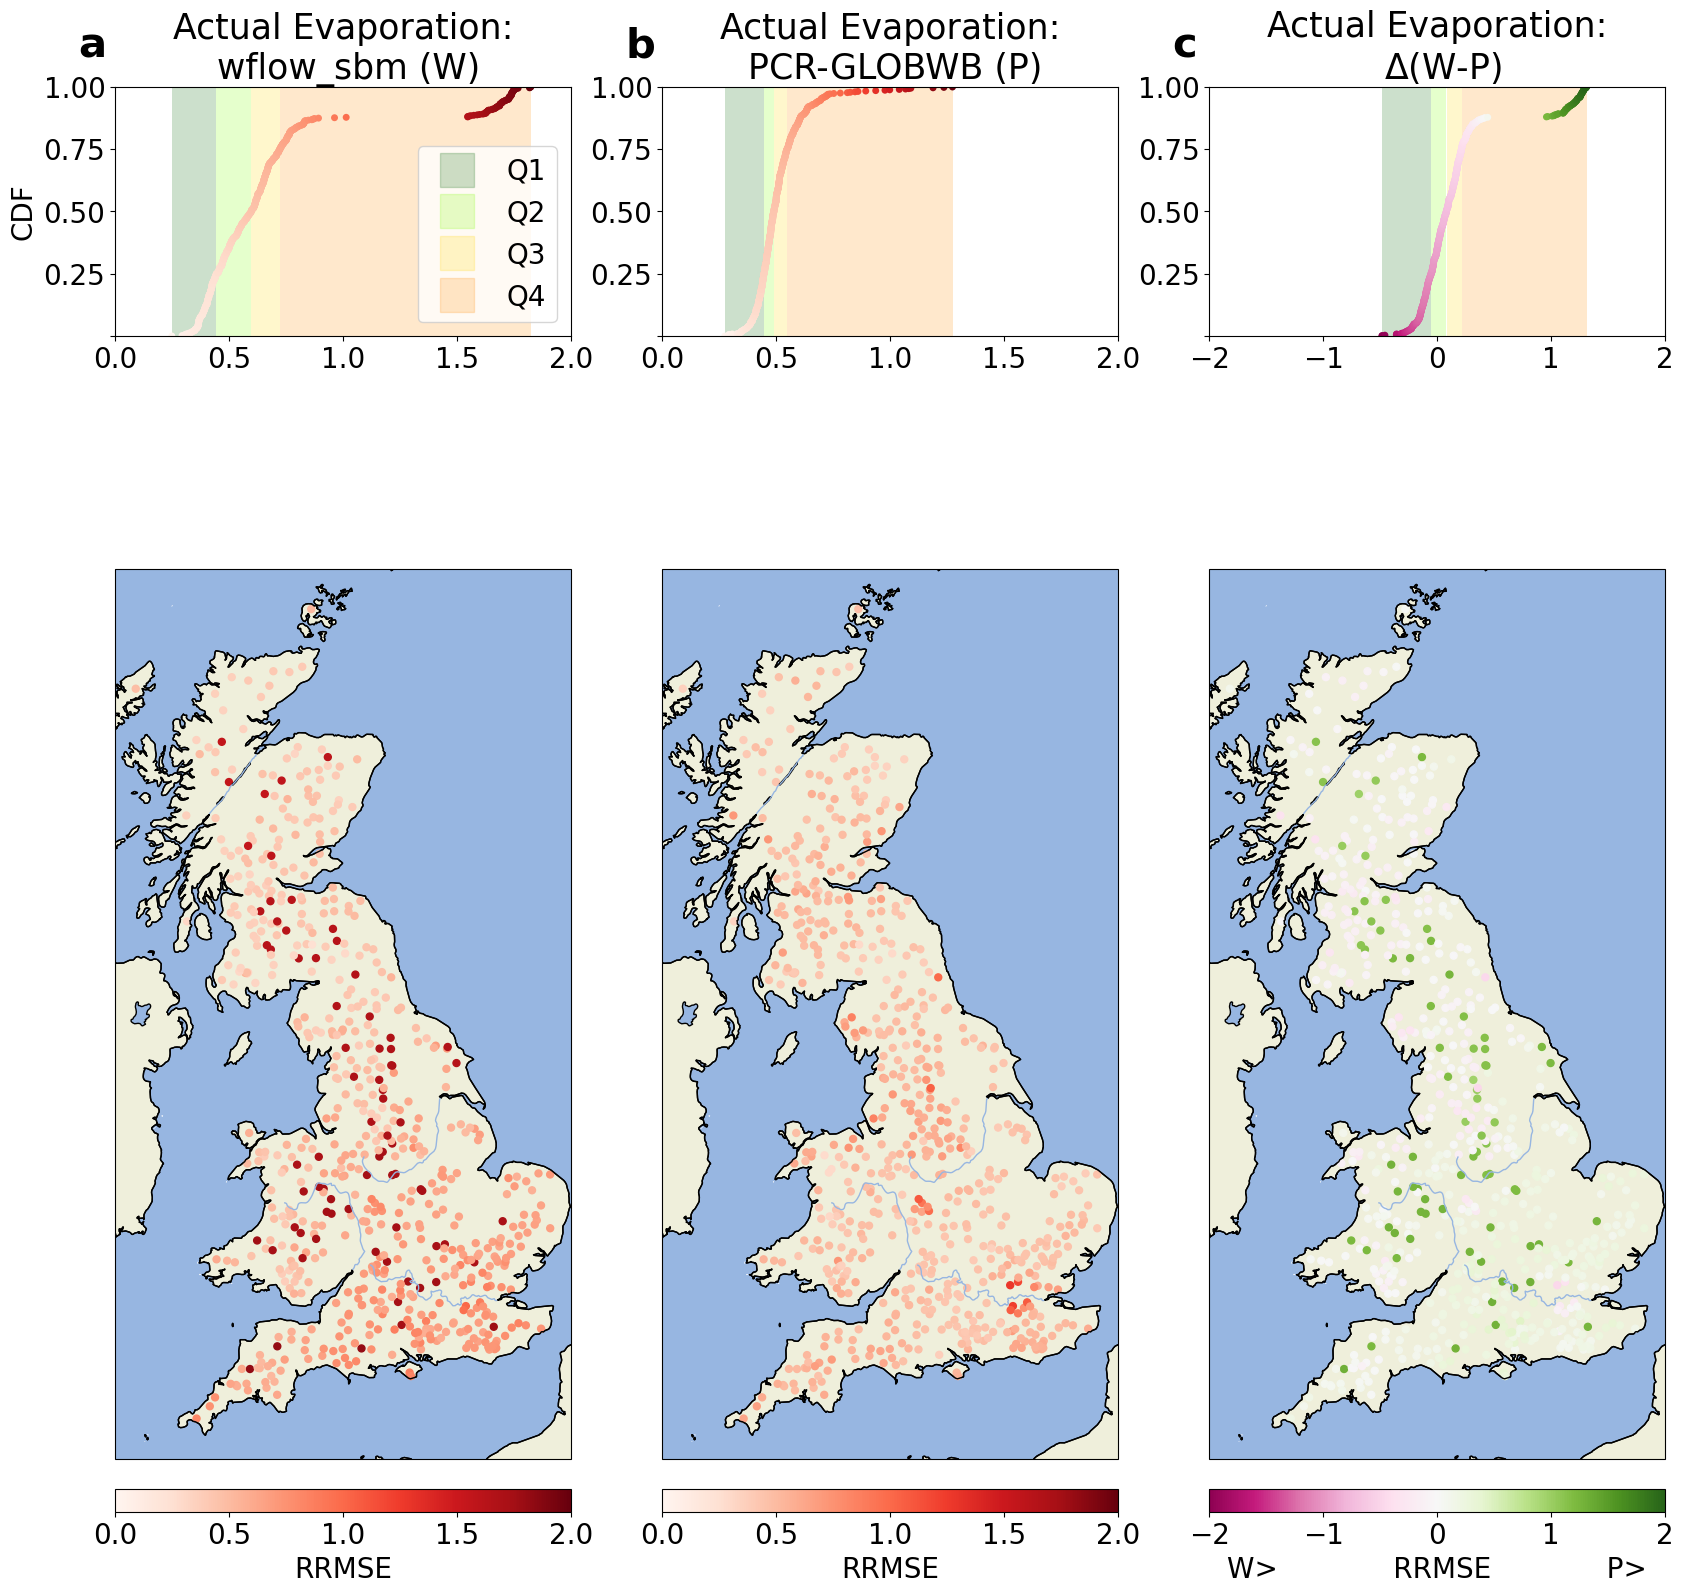

In [9]:
import string
import matplotlib.lines as mlines
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['lines.markersize'] = 5  

# fig, axes = plt.subplots(2, 3,figsize=(20, 20), subplot_kw={"projection": ccrs.PlateCarree()}, gridspec_kw={'height_ratios': [1, 2], 'width_ratios':[1,1,1]})
fig, axes = plt.subplots(2, 3,figsize=(20, 20), gridspec_kw={'height_ratios': [1, 12], 'width_ratios':[1,1,1]})



# fig.add_subplot(211, projection=ccrs.PlateCarree())
# plt.subplots_adjust(wspace=0.05, hspace=0)

colormap1 = 'Reds'
colormap2 = 'PiYG'
cmap = plt.cm.get_cmap(colormap1)

axes[0,0].axvspan(Q25_wflow_min,
            Q25_wflow_max,
            color="darkgreen", alpha=0.2, lw=0)
axes[0,0].axvspan(Q50_wflow_min,
            Q50_wflow_max,
            color="chartreuse", alpha=0.2, lw=0)
axes[0,0].axvspan(Q75_wflow_min,
            Q75_wflow_max,
            color="gold", alpha=0.2, lw=0)
axes[0,0].axvspan(Q100_wflow_min,
            Q100_wflow_max,
            color="darkorange", alpha=0.2, lw=0)


rect1 = mlines.Line2D([], [], marker="s", markersize=25, linewidth=0, color="darkgreen", alpha=0.2)
rect2 = mlines.Line2D([], [], marker="s", markersize=25, linewidth=0, color="chartreuse",alpha=0.2)
rect3 = mlines.Line2D([], [], marker="s", markersize=25, linewidth=0, color="gold", alpha=0.2)
rect4 = mlines.Line2D([], [], marker="s", markersize=25, linewidth=0, color="darkorange",alpha=0.2)

axes[0,0].legend((rect1, rect2, rect3, rect4), ('Q1', 'Q2', 'Q3', 'Q4'))
ax1 = sns.scatterplot(ax=axes[0,0], data=df_wflow, x='RRMSE', y='CDF', hue='RRMSE', palette=colormap1, legend=None, linewidth=0)
ax1.set_xlim(0, 2)
ax1.set_ylim(0,1)



axes[0,1].axvspan(Q25_pcrglob_min,
            Q25_pcrglob_max,
            color="darkgreen", alpha=0.2, lw=0)
axes[0,1].axvspan(Q50_pcrglob_min,
            Q50_pcrglob_max,
            color="chartreuse", alpha=0.2, lw=0)

axes[0,1].axvspan(Q75_pcrglob_min,
            Q75_pcrglob_max,
            color="gold", alpha=0.2, lw=0)
axes[0,1].axvspan(Q100_pcrglob_min,
            Q100_pcrglob_max,
            color="darkorange", alpha=0.2, lw=0)
ax2 = sns.scatterplot(ax=axes[0,1], data=df_pcrglob, x='RRMSE', y='CDF', hue='RRMSE', palette=colormap1, legend=None,linewidth=0)
ax2.set_xlim(0,2)
ax2.set_ylim(0,1)

axes[0,2].axvspan(Q25_delta_min,
            Q25_delta_max,
            color="darkgreen", alpha=0.2, lw=0)
axes[0,2].axvspan(Q50_delta_min,
            Q50_delta_max,
            color="chartreuse", alpha=0.2, lw=0)
axes[0,2].axvspan(Q75_delta_min,
            Q75_delta_max,
            color="gold", alpha=0.2, lw=0)
axes[0,2].axvspan(Q100_delta_min,
            Q100_delta_max,
            color="darkorange", alpha=0.2, lw=0)


ax3 = sns.scatterplot(ax=axes[0,2], data=df_delta, x='RRMSE', y='CDF', hue='RRMSE', palette=colormap2, legend=None,linewidth=0)
ax3.set_xlim(-2, 2)
ax3.set_ylim(0,1)

ax1.set(xlabel=None)
ax2.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)

fig.delaxes(axes[1,0])
axes[1,0] = fig.add_subplot(2, 3, 4, projection=ccrs.PlateCarree())
ax4 = gdf_results.plot(ax=axes[1,0], column='RRMSE_et_wflow',
                        cmap=colormap1,
                        vmin=0,
                        vmax=2,
                        legend=True,
                        legend_kwds={'label': "RRMSE",
                                     'orientation': "horizontal",
                                     "fraction":0.046,
                                     "pad":0.01},
                       
                      )

fig.delaxes(axes[1,1])
axes[1,1] = fig.add_subplot(2, 3, 5, projection=ccrs.PlateCarree())

ax5 = gdf_results.plot(ax=axes[1,1], column='RRMSE_et_pcrglob',
                        cmap=colormap1,
                        vmin=0,
                        vmax=2,
                        legend=True,
                        legend_kwds={'label': "RRMSE",
                                     'orientation': "horizontal",
                                     "fraction":0.046,
                                     "pad":0.01,
                                    })
fig.delaxes(axes[1,2])
axes[1,2] = fig.add_subplot(2, 3, 6, projection=ccrs.PlateCarree())

ax6 = gdf_results.plot(ax=axes[1,2], column='RRMSE_et_delta_wp',
                        cmap=colormap2,
                        vmin=-2,
                        vmax=2,
                        legend=True,
                        legend_kwds={'label': "W>             RRMSE             P>",
                                     'orientation': "horizontal",
                                     "fraction":0.046,
                                     "pad":0.01,
                                    })

ax4.add_feature(cartopy.feature.OCEAN)
ax4.add_feature(cartopy.feature.LAND, edgecolor='black')
ax4.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax4.add_feature(cartopy.feature.RIVERS)
ax4.coastlines(resolution='10m')

ax5.add_feature(cartopy.feature.OCEAN)
ax5.add_feature(cartopy.feature.LAND, edgecolor='black')
ax5.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax5.add_feature(cartopy.feature.RIVERS)
ax5.coastlines(resolution='10m')

ax6.add_feature(cartopy.feature.OCEAN)
ax6.add_feature(cartopy.feature.LAND, edgecolor='black')
ax6.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax6.add_feature(cartopy.feature.RIVERS)
ax6.coastlines(resolution='10m')

ax1.set_title('Actual Evaporation:\n wflow_sbm (W)', size=25)
ax2.set_title('Actual Evaporation:\n PCR-GLOBWB (P)', size=25)
ax3.set_title('Actual Evaporation:\n $\Delta$(W-P)', size=25)

axes[0,0].text(-0.08,1.12, string.ascii_lowercase[0], transform=axes[0,0].transAxes, 
            size=30, weight='bold')
axes[0,1].text(-0.08,1.12, string.ascii_lowercase[1], transform=axes[0,1].transAxes, 
            size=30, weight='bold')
axes[0,2].text(-0.08,1.12, string.ascii_lowercase[2], transform=axes[0,2].transAxes, 
            size=30, weight='bold')


yticks=['','0.25','0.50','0.75','1.00']
cmap = ax1.get_figure().get_axes()[0]
cmap.set_yticklabels(yticks)
cmap = ax1.get_figure().get_axes()[1]
cmap.set_yticklabels(yticks)
cmap = ax1.get_figure().get_axes()[2]
cmap.set_yticklabels(yticks)

plt.subplots_adjust(wspace=0.2, hspace=-1.05)

plt.savefig(f'/home/jaerts/model_refinement_master/new_scripts/figures/3_fig_evaporation_evaluation_spatial_2.png', bbox_inches='tight', dpi=400)